In [107]:
pwd

'C:\\Users\\Shivtej'

In [108]:
import numpy as np
import pandas as pd

In [109]:
data=pd.read_csv("C:/Users/Shivtej/spam_ham_dataset.csv", index_col=0)

In [110]:
data.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [111]:
data.shape

(5171, 3)

In [112]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5171 entries, 605 to 4807
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   label      5171 non-null   object
 1   text       5171 non-null   object
 2   label_num  5171 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 161.6+ KB


In [113]:
data.isnull().sum()

label        0
text         0
label_num    0
dtype: int64

In [114]:
data.duplicated().sum()


178

In [115]:
data=data.drop_duplicates(keep='first')


In [116]:
data.duplicated().sum()


0

In [117]:
data.shape

(4993, 3)

In [118]:
data.head()

,label,text,label_num
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
4685,spam,"Subject: photoshop , windows , office . cheap ...",1
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [119]:
data['label'].value_counts()


ham     3531
spam    1462
Name: label, dtype: int64

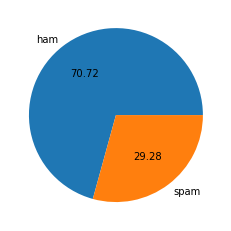

In [120]:
import matplotlib.pyplot as plt
plt.pie(data['label'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f')
plt.show()


In [121]:
import nltk

In [122]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Shivtej\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [123]:
data['num_characters']=data['text'].apply(len)


In [124]:
data.head()


,label,text,label_num,num_characters
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336


In [125]:
data['num_sentences']=data['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [126]:
data.head()


,label,text,label_num,num_characters,num_sentences
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,3
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,1
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,20
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,3
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,3


In [127]:
data[['num_characters', 'label_num', 'num_sentences']].describe()


,num_characters,label_num,num_sentences
count,4993.000000,4993.000000,4993.000000
mean,1069.426397,0.292810,10.202884
std,1547.863387,0.455098,22.003030
min,11.000000,0.000000,1.000000
25%,256.000000,0.000000,3.000000
50%,557.000000,0.000000,6.000000
75%,1262.000000,1.000000,12.000000
max,32258.000000,1.000000,1163.000000


In [128]:
data[data['label_num']==1][['num_characters', 'num_sentences']].describe()


,num_characters,num_sentences
count,1462.000000,1462.000000
mean,1249.326265,13.579343
std,1840.112883,20.883535
min,11.000000,1.000000
25%,304.250000,3.000000
50%,589.000000,8.000000
75%,1305.000000,15.000000
max,22073.000000,331.000000


In [129]:
import seaborn as sns

<AxesSubplot:xlabel='num_characters', ylabel='Count'>

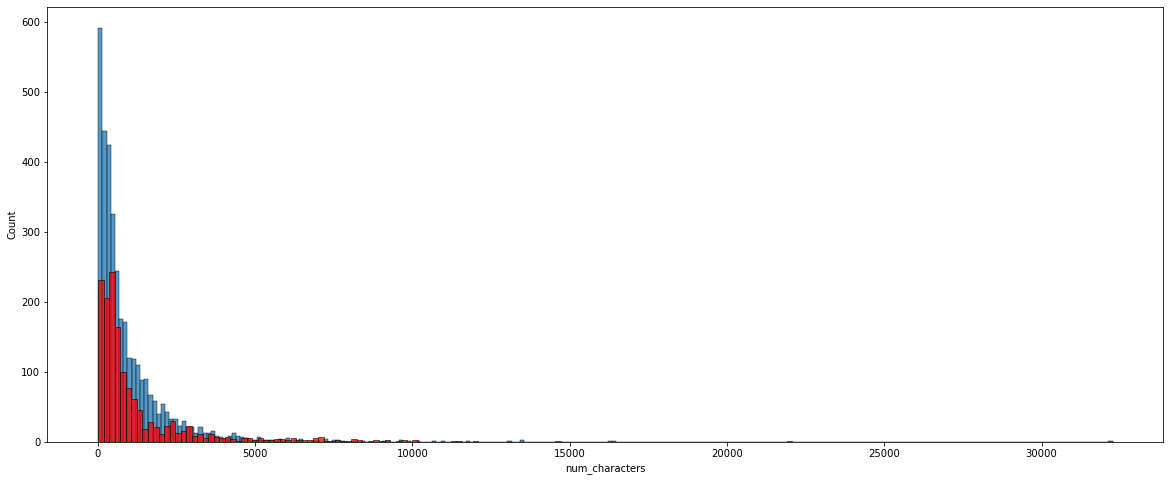

In [130]:
plt.figure(figsize=(20,8))
sns.histplot(data[data['label_num']==0]['num_characters'])
sns.histplot(data[data['label_num']==1]['num_characters'], color='red')


<AxesSubplot:xlabel='num_sentences', ylabel='Count'>

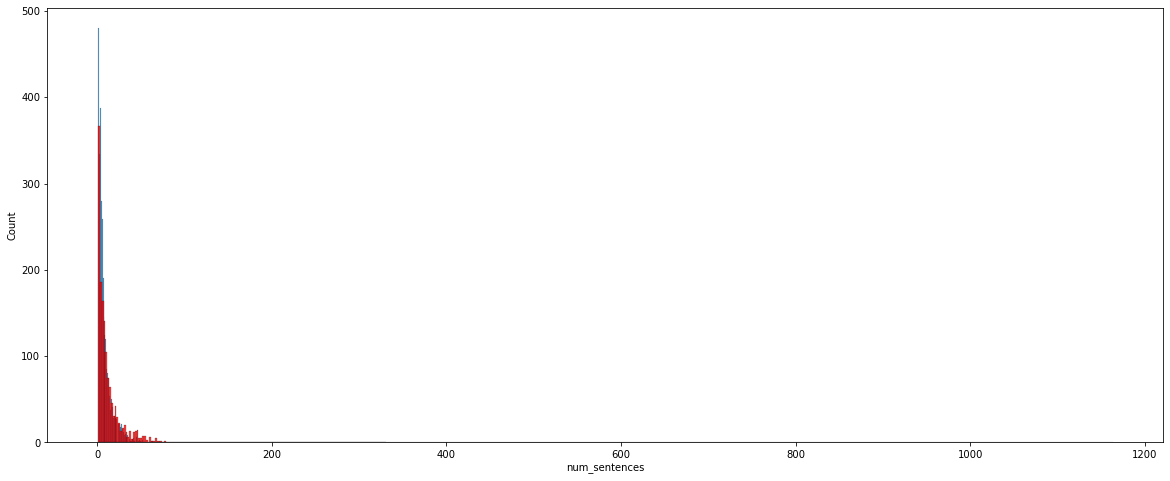

In [131]:
plt.figure(figsize=(20,8))
sns.histplot(data[data['label_num']==0]['num_sentences'])
sns.histplot(data[data['label_num']==1]['num_sentences'], color='red')


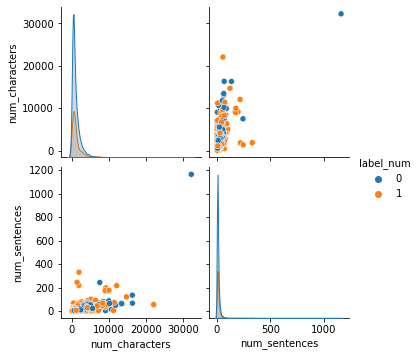

In [132]:
sns.pairplot(data, hue='label_num')


<AxesSubplot:>

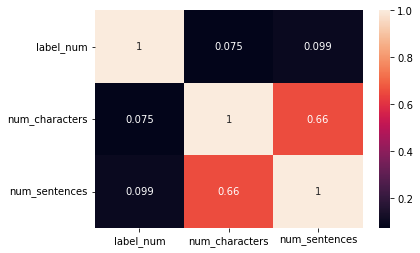

In [133]:
sns.heatmap(data.corr(), annot=True)


In [134]:
import string
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()


def transform_text(text):
    text=text.lower()
    text=nltk.word_tokenize(text)
    
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
     
    
    text=y[:]
    y.clear()
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    
    # convert into root words
    text=y[:]
    y.clear()
    for i in text:
        y.append(ps.stem(i))
        
    return ' '.join(y)

In [135]:
transform_text("Subject: enron methanol ; meter # : 988291\r\nthis is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary\r\nflow data provided by daren } .\r\nplease override pop ' s daily volume { presently zero } to reflect daily\r\nactivity you can obtain from gas control .\r\nthis change is needed asap for economics purposes .")


'subject enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [136]:
data.head()

,label,text,label_num,num_characters,num_sentences
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,3
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,1
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,20
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,3
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,3


In [137]:
from functools import cache

In [49]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable

  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [138]:
from wordcloud import WordCloud

In [139]:
wc = WordCloud(width=500, height=500, min_font_size=10, background_color='white')


In [140]:
spam_wc = wc.generate(data[data['label_num']==1]['transformed_text'].str.cat(sep=' '))
plt.figure(figsize=(15, 6))
plt.imshow(spam_wc)


KeyError: 'transformed_text'

In [141]:
data.head()

,label,text,label_num,num_characters,num_sentences
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,3
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,1
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,20
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,3
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,3


In [142]:
spam_corpus=[]


In [143]:
len(spam_corpus)


0

In [144]:
data.head()

,label,text,label_num,num_characters,num_sentences
605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0,327,3
2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0,97,1
3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0,2524,20
4685,spam,"Subject: photoshop , windows , office . cheap ...",1,414,3
2030,ham,Subject: re : indian springs\r\nthis deal is t...,0,336,3


In [145]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf=TfidfVectorizer(max_features=17000)


In [146]:
x = data['label_num'].values


In [147]:
y = data['label_num'].values


In [148]:
x

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [149]:
y

array([0, 0, 0, ..., 0, 0, 1], dtype=int64)

In [150]:
from sklearn.model_selection import train_test_split


In [151]:
x_train,x_test,Y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)


In [152]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [153]:
mnb = MultinomialNB()

In [154]:
mnb.fit(X_tain,y_train)
y_pred = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(precision_score(y_test,y_pred))

NameError: name 'X_tain' is not defined

In [155]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))